In [14]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [16]:
# Load numpy array
features = np.load('data/processed/validation_pool_max_reps.npy')

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
kmeans = KMeans(
    init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42
)

In [19]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [24]:
# The lowest SSE value
kmeans.inertia_

143961024.95790452

In [25]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.99886105, -0.95960879, -0.99357007, ..., -0.89506981,
        -0.91105825, -0.8735588 ],
       [-0.04490431, -0.05013775, -0.03522232, ..., -0.07704343,
        -0.09048796, -0.04485921],
       [ 0.90823063,  0.88357644,  0.88852545, ...,  0.87190181,
         0.90650927,  0.80311021]])

In [26]:
# The number of iterations required to converge
kmeans.n_iter_

26

In [27]:
kmeans.labels_[:5]

array([2, 1, 1, 2, 1], dtype=int32)

# Choose the Number of Clusters

In [28]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [29]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [30]:
kl.elbow

3

In [31]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

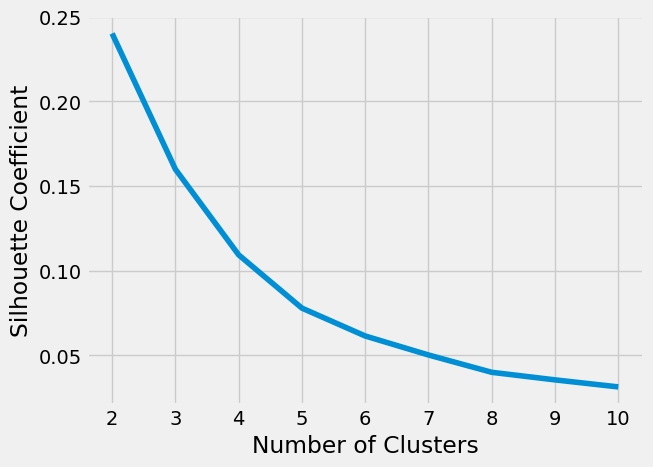

In [32]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()